In [4]:
import numpy as np
import matplotlib.pyplot as plt

mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1, 0.3], [0.3, 1]])
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 100)

mean_02 = np.array([6.0, 7.0])
cov_02 = np.array([[1.5, 0.3], [0.3, 1]])
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 100)

mean_03 = np.array([7.0, -5.0])
dist_03 = np.random.multivariate_normal(mean_03, cov_01, 100)

mean_04 = np.array([2.0, -7.0])
cov_04 = np.array([[1.2, 0.5], [0.5, 1.3]])
dist_04 = np.random.multivariate_normal(mean_04, cov_01, 100)

data = np.vstack((dist_01, dist_02, dist_03, dist_04))
np.random.shuffle(data)

In [ ]:
data.shape

In [6]:
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker='.', color='gray', label='Data Points')
    if centroids.shape[0] > 1:
        plt.scatter(centroids[:-1, 0], centroids[:-1, 1], color='black', label='Selected Centroids')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], color='red', label='Next Centroid')
    plt.title(f'Select {centroids.shape[0]}th Centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [5]:
def distance(p1, p2):
    dist = np.sqrt(np.sum((p1 - p2) ** 2))
    return dist

In [12]:
def initialize(data, k):
    centroids = []

    # Choose first centroid uniformly at random
    centroids.append(data[np.random.randint(data.shape[0])]) 

    for _ in range(k - 1):
        distances_squared = []

        for point in data:
            # compute min dist from point to all centroids
            min_dist = min([distance(point, centroid) for centroid in centroids])
            distances_squared.append(min_dist ** 2)
        
        distances_squared = np.array(distances_squared)

        probs = distances_squared / np.sum(distances_squared)

        next_centroid_idx = np.random.choice(range(len(data)), p=probs)
        centroids.append(data[next_centroid_idx])
    return np.array(centroids)

In [19]:
# Run initialization
centroids = initialize(data, k=4)

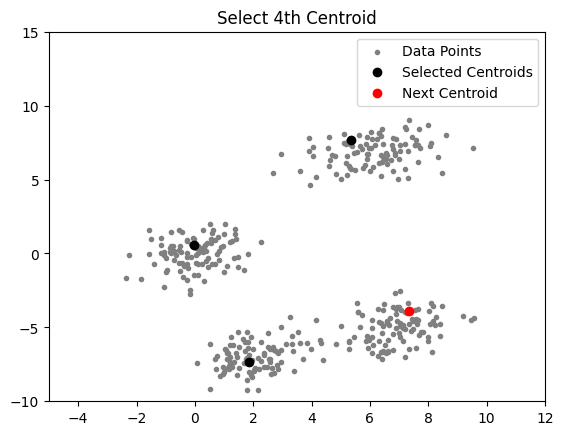

In [20]:
# Plot final result
plot(data, centroids)